In [1]:
# ------ Import all the libraries -----#

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# -------- Place where Test and Train saved ----#

DATADIR = 'ASTRO_IMAGES_40/Bbh_ALL/TRAIN/TRAIN1/'
CATEGORIES = ['bbh_grey_1','bbh_noise_grey_1'] # 0 for signal and 1  for noise

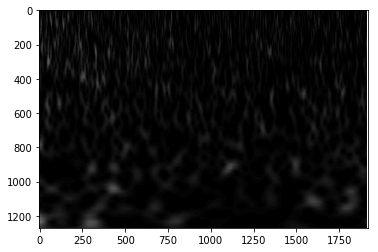

In [2]:
# Just for one image lets check.

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [3]:
img_array.shape


(1270, 1920)

(1270, 1920)


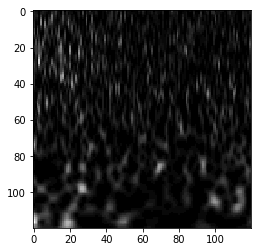

In [4]:
print(img_array.shape)
img_size = 120
new_array = (cv2.resize(img_array,(img_size,img_size)))
plt.imshow(new_array,cmap='gray')
plt.show()

In [8]:
# Training the data.

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                #print(new_array)
                print(label)
                training_data.append([new_array,label])
            except Exception as e:
                print(e)
create_training_data()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [9]:
import random
random.shuffle(training_data)

for sample in training_data:
    print(sample[0])
    


[[12  4 14 ...  8  0  0]
 [12  4 12 ...  6  0  0]
 [12  4 10 ...  6  0  0]
 ...
 [ 0  0  4 ...  4  0  0]
 [ 0  0  1 ...  4  0  0]
 [ 0  0  0 ...  4  0  0]]
[[27  2 34 ...  0  8 15]
 [28  4 26 ...  0  4 20]
 [20  6 24 ...  4  2 18]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  4  4  4]]
[[16  0 44 ... 12  4  4]
 [ 8  0 39 ... 14  8  4]
 [12  0 28 ... 10  6  6]
 ...
 [ 4  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 4  1  0 ...  0  0  0]]
[[34 16  0 ...  0  4  8]
 [29 20  4 ...  0  8 19]
 [16 24 12 ...  0 10 20]
 ...
 [20 10  8 ...  4  0  0]
 [36 28 24 ...  4  4  4]
 [32 32 28 ...  8  8  8]]
[[255 255 255 ... 255 255 255]
 [159 161 162 ... 161 162 159]
 [  0   4  12 ...   6   8   0]
 ...
 [  0   4   4 ...  20  20  16]
 [  4   4   4 ...  20  20  20]
 [255 255 255 ... 255 255 255]]
[[ 8  0 10 ...  2 21  0]
 [ 8  4  7 ...  0 25  0]
 [12  8  4 ...  0 28  0]
 ...
 [ 4  4  4 ...  4  8 12]
 [ 4  8  4 ...  8 12 12]
 [ 8  8  4 ...  8 12 16]]
[[36 17 38 ...  4  8 14]
 [2

In [10]:
print(len(training_data))

80


In [11]:
# Before normalization
# Full training set.
x_train = [] # images array
y_train = [] # labels

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

y =x_train[0].shape
x_train = np.array(x_train).reshape(-1,img_size,img_size,1)
y

(120, 120)

In [22]:
x_train

array([[[[ 12],
         [  4],
         [ 14],
         ...,
         [  8],
         [  0],
         [  0]],

        [[ 12],
         [  4],
         [ 12],
         ...,
         [  6],
         [  0],
         [  0]],

        [[ 12],
         [  4],
         [ 10],
         ...,
         [  6],
         [  0],
         [  0]],

        ...,

        [[  0],
         [  0],
         [  4],
         ...,
         [  4],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  1],
         ...,
         [  4],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  4],
         [  0],
         [  0]]],


       [[[ 27],
         [  2],
         [ 34],
         ...,
         [  0],
         [  8],
         [ 15]],

        [[ 28],
         [  4],
         [ 26],
         ...,
         [  0],
         [  4],
         [ 20]],

        [[ 20],
         [  6],
         [ 24],
         ...,
         [  4],
         [

In [13]:
print(len(y_train))

80


In [14]:
print(len(x_train))

80


In [15]:
X_train = x_train/255.0 # Normalization.

(120, 120)

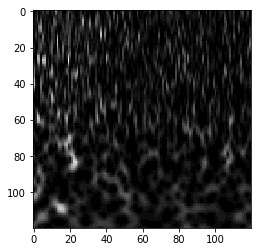

In [17]:
X_train[3]
plt.imshow(X_train[79,:,:,0],cmap="gray")
X_train[79,:,:,0].shape
# please check
# normalization

In [18]:
X_train.shape[1:]

(120, 120, 1)

In [21]:
X_train[1]

array([[[0.10588235],
        [0.00784314],
        [0.13333333],
        ...,
        [0.        ],
        [0.03137255],
        [0.05882353]],

       [[0.10980392],
        [0.01568627],
        [0.10196078],
        ...,
        [0.        ],
        [0.01568627],
        [0.07843137]],

       [[0.07843137],
        [0.02352941],
        [0.09411765],
        ...,
        [0.01568627],
        [0.00784314],
        [0.07058824]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.01568627],
        [0.01568627],
        [0.01568627]]])

In [17]:
# model

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [23]:
model = Sequential()

#1
model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:]))#8
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2
model.add(Conv2D(32,(3,3)))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3
model.add(Conv2D(32,(3,3)))
model.add(Activation("elu"))

#4
model.add(Conv2D(16,(3,3)))
model.add(Activation("elu"))

#5
model.add(Conv2D(16,(3,3)))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#6
model.add(Conv2D(16,(3,3)))
model.add(Activation("elu"))

#7
model.add(Flatten())
#model.add(Dense(64))
model.add(Dense(64,activation=tf.nn.elu))
model.add(Dropout(0.5))

#8
#model.add(Dense(64))
model.add(Dense(64,activation=tf.nn.elu))
model.add(Dropout(0.5))

#9
model.add(Dense(1)) # note
model.add(Activation('softmax'))
#model.add(Dense(2,activation=tf.nn.softmax))


model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


model.fit(X_train,y_train,batch_size=10,epochs=15,validation_split=0.1)

NameError: name 'Sequential' is not defined

In [ ]:

# ------------------ Testing -------------------#

In [ ]:
# Testing Data 
 
DATADIR_TEST = "ASTRO_IMAGES_40/Bbh_ALL/TEST/TEST1_ALL/"
testing_data = []
def creating_testing_data():
    for img in os.listdir(DATADIR_TEST):
        path = os.path.join(DATADIR_TEST,img)
        img_num = img.split('.')[0]
        print(img_num)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(img_size,img_size))
        testing_data.append([np.array(img),img_num])
    return testing_data

creating_testing_data()

In [ ]:
print(len(testing_data))

In [ ]:
# Full testing Set.

x_test = []
y_test = []

for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1,img_size,img_size,1)

In [ ]:
x_test.shape

In [ ]:
X_test = x_test/255.0

In [ ]:
# Now we have model which is trained .. so Prediction.

image_index = 1
plt.imshow(X_test[image_index].reshape(img_size,img_size), cmap = 'Greys')
print(y_test[image_index])
pred = model.predict(x_test[image_index].reshape(1,img_size,img_size,1))


In [ ]:
print('Prediction is ---"0 for signal and 1 for noise"----------------> ',pred.argmax())